In [1]:
# 1. Data Gathering
# First, we’ll gather and load the COVID-19 dataset using pandas.
import pandas as pd

# Load the dataset
df = pd.read_csv('covid19.csv')

# View the first few rows of the dataset
print(df.head())


  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

In [3]:
#2. Data Preparation
#This step involves handling missing data, renaming columns for clarity
#and ensuring correct data types. Additionally, we can create some new 
#columns for analysis, like the percentage of active cases.

# Handle missing values by dropping or filling them
df = df.fillna(0)

# Rename columns for better understanding
df = df.rename(columns={'Deaths / 100 Cases': 'Deaths per 100 Cases',
                        'Recovered / 100 Cases': 'Recovered per 100 Cases',
                        'Deaths / 100 Recovered': 'Deaths per 100 Recovered'})

# Convert necessary columns to numeric if needed
df['Confirmed'] = pd.to_numeric(df['Confirmed'], errors='coerce')

# Feature Engineering: Create a column for active case percentage
df['Active Case Percentage'] = (df['Active'] / df['Confirmed']) * 100

# View dataset summary after preparation
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country/Region            187 non-null    object 
 1   Confirmed                 187 non-null    int64  
 2   Deaths                    187 non-null    int64  
 3   Recovered                 187 non-null    int64  
 4   Active                    187 non-null    int64  
 5   New cases                 187 non-null    int64  
 6   New deaths                187 non-null    int64  
 7   New recovered             187 non-null    int64  
 8   Deaths per 100 Cases      187 non-null    float64
 9   Recovered per 100 Cases   187 non-null    float64
 10  Deaths per 100 Recovered  187 non-null    float64
 11  Confirmed last week       187 non-null    int64  
 12  1 week change             187 non-null    int64  
 13  1 week % increase         187 non-null    float64
 14  WHO Region

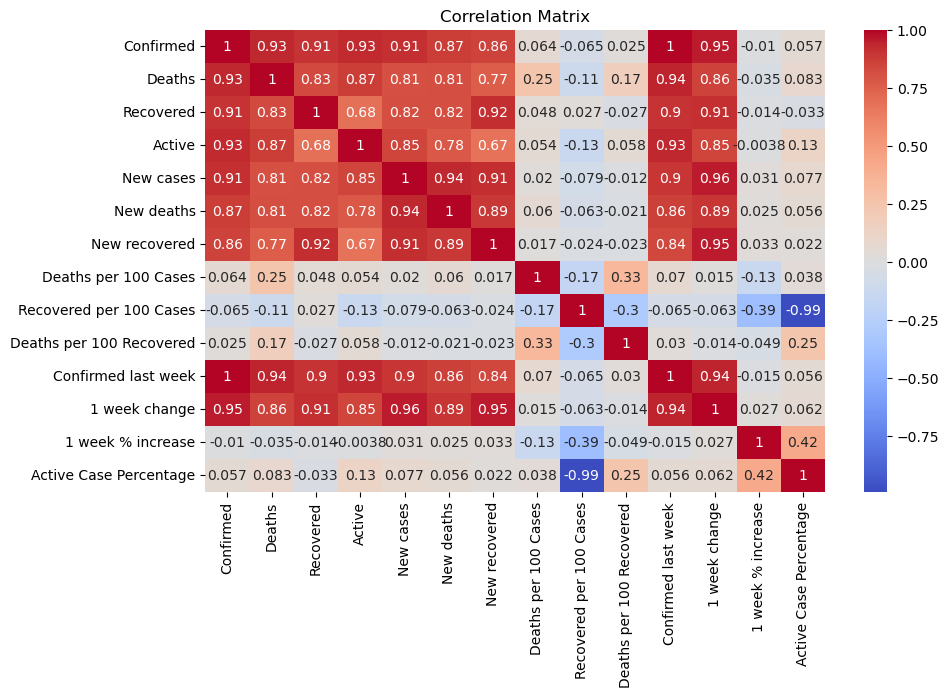

In [11]:
# 3. Exploratory Data Analysis (EDA)
# Before applying algorithms, explore the data to get insights.
# You can check how different regions compare in terms of COVID-19 cases, deaths, etc.


# Plotting total confirmed cases by WHO Region
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns before generating the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generate the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [39]:
# 4. Data Analysis with Algorithms
# In this project, we'll implement a Linear Regression model to predict confirmed 
#cases based on the available features. Optionally, we can apply a Random Forest
#Regressor or Decision Tree to compare results.
#linear reggresion
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
X = df[['Confirmed last week', '1 week change']]
y = df['Confirmed']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Results
print("Linear Regression Predictions: ", y_pred)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R-Squared Score: ", r2_score(y_test, y_pred))


Linear Regression Predictions:  [4.55200e+03 1.85400e+03 2.65000e+02 4.59020e+04 7.93950e+04 6.72510e+04
 1.20000e+01 4.52529e+05 3.43900e+03 6.70960e+04 2.80500e+03 1.56550e+04
 7.23500e+03 2.26000e+02 8.11610e+04 6.64280e+04 5.09000e+02 3.01708e+05
 2.46286e+05 9.90000e+01 4.11800e+04 1.84300e+03 8.60000e+01 1.14000e+02
 1.41000e+02 2.08700e+03 2.05580e+04 8.16680e+05 5.02990e+04 3.44770e+04
 1.77000e+03 2.27019e+05 3.97410e+04 3.36240e+04 1.40000e+01 3.47923e+05
 5.05000e+02 2.68934e+05]
Mean Squared Error:  8.239254865582862e-22
R-Squared Score:  1.0


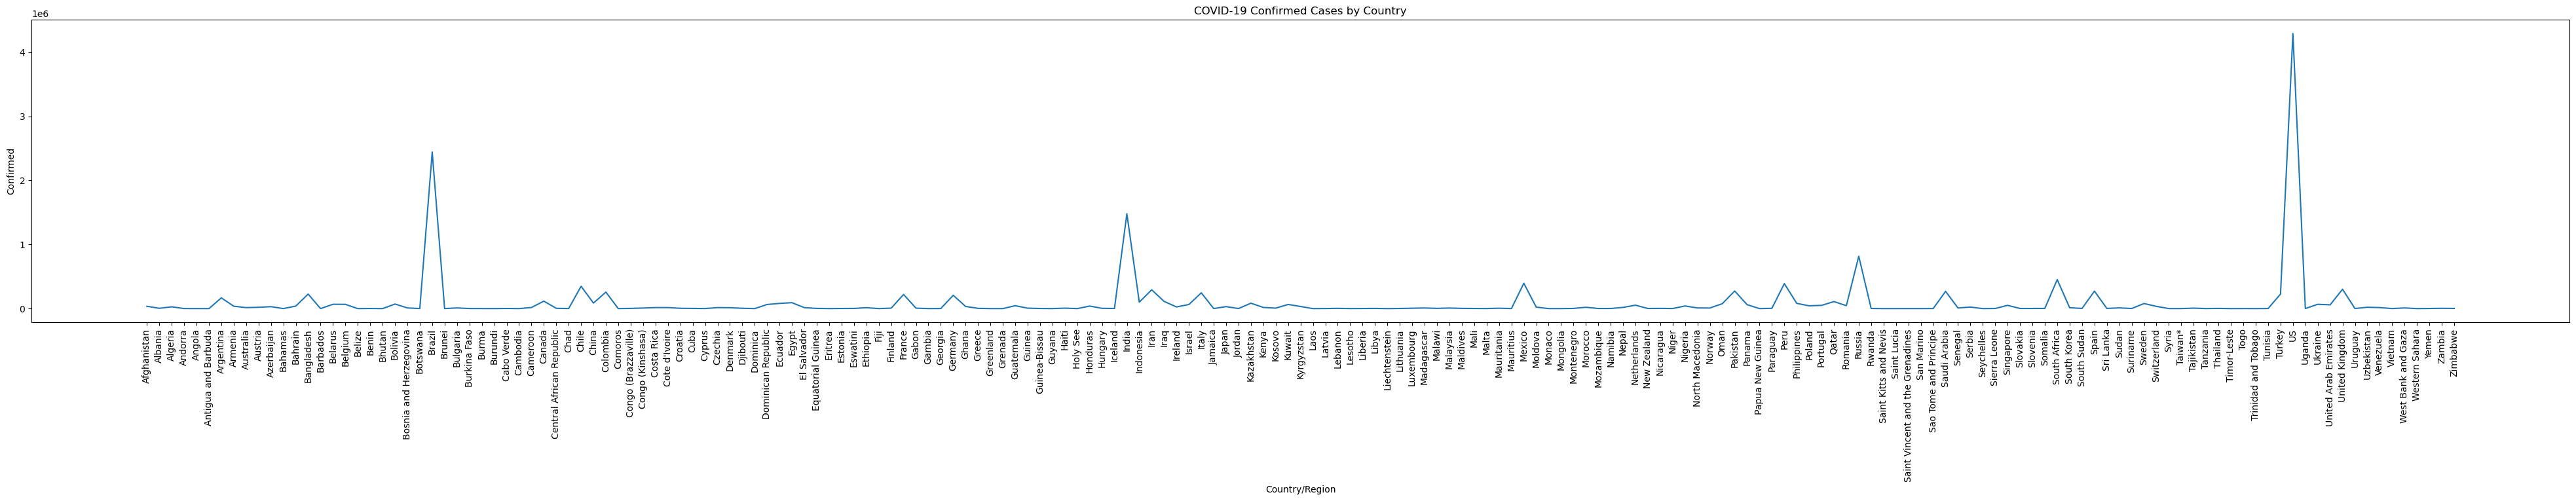

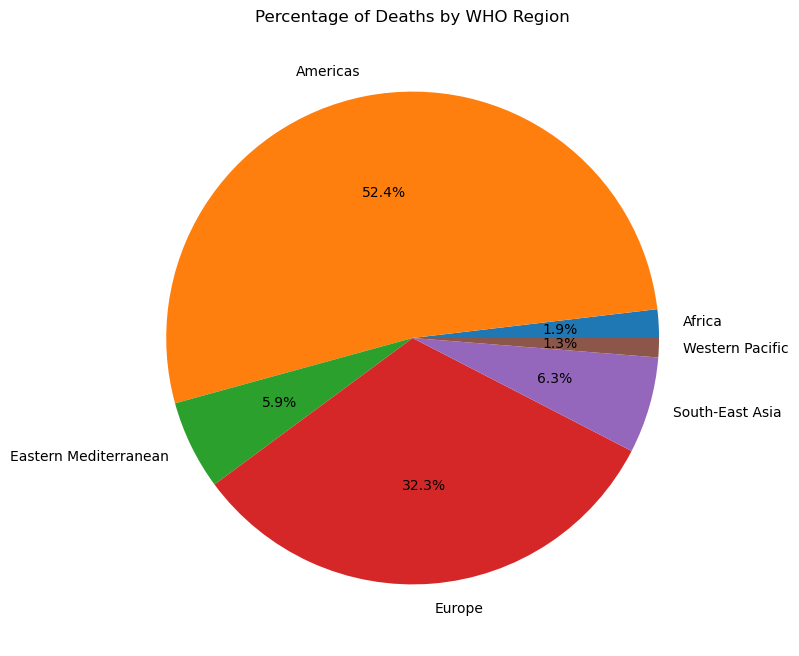

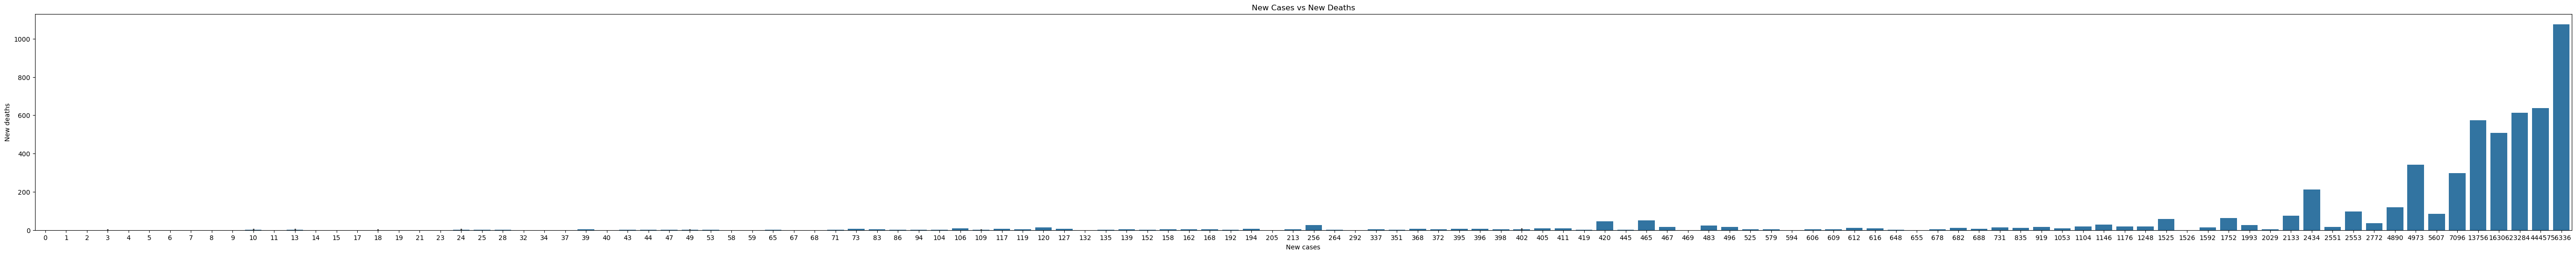

In [27]:
# 5. Data Visualization
# Visualize trends and distribution of the data for better insights.
# Line plot showing trends of confirmed cases
plt.figure(figsize=(50, 6))
sns.lineplot(data=df, x='Country/Region', y='Confirmed')
plt.title('COVID-19 Confirmed Cases by Country')
plt.xticks(rotation=90)
plt.show()

# Pie chart of deaths per WHO region
plt.figure(figsize=(8, 8))
df.groupby('WHO Region')['Deaths'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Deaths by WHO Region')
plt.ylabel('')
plt.show()

# Bar plot for new cases vs new deaths
plt.figure(figsize=(70, 6))
sns.barplot(x='New cases', y='New deaths', data=df)
plt.title('New Cases vs New Deaths')
plt.show()


In [37]:
# 6. Performance Evaluation
# Evaluating the performance of the algorithms using various metrics like RMSE, R-Squared, etc.
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Step 6: Performance Evaluation

# Linear Regression RMSE
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)  # Manually calculate the root mean squared error
print(f"Linear Regression RMSE: {lr_rmse}")

# Random Forest RMSE
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)  # Manually calculate the root mean squared error
print(f"Random Forest RMSE: {rf_rmse}")

Linear Regression RMSE: 2.8704102260100143e-11
Random Forest RMSE: 17630.50469161558
